In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

import flask
from flask import Flask, jsonify

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#measurement columns
inspector = inspect(engine)

columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
#station columns
inspector = inspect(engine)

columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
#Measurement table
engine.execute('SELECT * From measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [12]:
#Station table
engine.execute('SELECT * From station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [13]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date).first()

('2010-01-01',)

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
start_date = session.query(measurement.date).order_by(measurement.date.desc()).first().date
start_date
# Calculate the date one year from the last date in data set.

end_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
session.query(measurement.date, measurement.prcp).\
    order_by(measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_info = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= end_date).\
    order_by(measurement.date.asc()).all()

# Sort the dataframe by date
precipitation_df = pd.DataFrame(precipitation_info, columns=['Date', 'Precipitation'])
precipitation_df.set_index('Date', inplace=True, )
prcp_date = precipitation_df.sort_values(by='Date', ascending=True)
prcp_date


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


In [16]:
start_date = session.query(measurement.date).order_by(measurement.date.desc()).first().date
start_date
end_date

datetime.date(2016, 8, 23)

<Figure size 432x288 with 0 Axes>

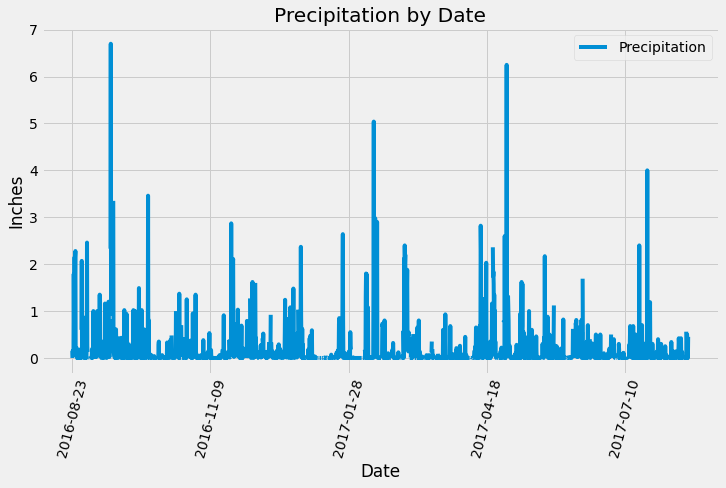

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
fig=plt.figure()
ax=fig.add_subplot

ax = prcp_date.plot(title= "Precipitation by Date", grid = True, figsize =(10,7), rot=75)
plt.tight_layout()
ax.set(xlabel="Date", ylabel="Inches")
plt.show()


In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_date.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset
session.query(station.station).count()

9

In [43]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
station_tob = []

for result in temp_info:
    row = {}
    row["station"] = result[0]
    row["date"] = result[1]
    row["tobs"] = result[2]
    station_tob.append(row)
    
print(station_tob)

[{'station': 'USC00519281', 'date': '2016-08-23', 'tobs': 77.0}, {'station': 'USC00519281', 'date': '2016-08-24', 'tobs': 77.0}, {'station': 'USC00519281', 'date': '2016-08-25', 'tobs': 80.0}, {'station': 'USC00519281', 'date': '2016-08-26', 'tobs': 80.0}, {'station': 'USC00519281', 'date': '2016-08-27', 'tobs': 75.0}, {'station': 'USC00519281', 'date': '2016-08-28', 'tobs': 73.0}, {'station': 'USC00519281', 'date': '2016-08-29', 'tobs': 78.0}, {'station': 'USC00519281', 'date': '2016-08-30', 'tobs': 77.0}, {'station': 'USC00519281', 'date': '2016-08-31', 'tobs': 78.0}, {'station': 'USC00519281', 'date': '2016-09-01', 'tobs': 80.0}, {'station': 'USC00519281', 'date': '2016-09-02', 'tobs': 80.0}, {'station': 'USC00519281', 'date': '2016-09-03', 'tobs': 78.0}, {'station': 'USC00519281', 'date': '2016-09-04', 'tobs': 78.0}, {'station': 'USC00519281', 'date': '2016-09-05', 'tobs': 78.0}, {'station': 'USC00519281', 'date': '2016-09-06', 'tobs': 73.0}, {'station': 'USC00519281', 'date': '201

In [44]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_id = stations[0][0]
active_station_id

'USC00519281'

In [45]:
#calculate the lowest, highest, and average temperature
active_station_temp = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter (active_station_id == measurement.station).all()

active_station_temp

[(54.0, 85.0, 71.66378066378067)]

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
temp_info = session.query(measurement.station, measurement.date, measurement.tobs).\
    filter(measurement.station == active_station_id).\
    filter(measurement.date >= end_date).\
    order_by(measurement.date.asc()).all()
temp_info

[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC005192

<AxesSubplot:ylabel='Frequency'>

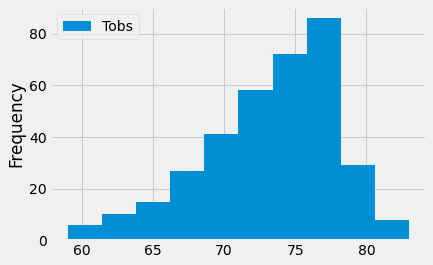

In [24]:
# plot the results as a histogram

#temp dataframe
tobs_df = pd.DataFrame(temp_info, columns=['Station', 'Date', 'Tobs'])
tobs_df.set_index('Station', inplace=True, )
tobs_order = tobs_df.sort_values(by='Station', ascending=True)

tobs_order.plot.hist(by=None, bins=10)


# Close session

In [25]:
# Close Session
session.close()